### 1.What makes time series forecasting special?
* **Trend**: Upward & downward movement of the data with time over a large period of time (i.e. house appreciation)
* **Seasonality**: Seasonal variance
* **Noise**: Spikes & troughs at random intervals

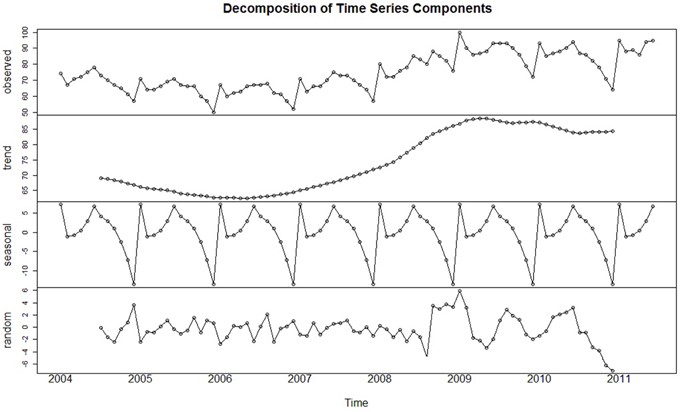

### 2.Import Stock Data for Analysis
* Usually we make the date information to be the index 
* parse_dates:This specifies a function which converts an input string into datetime variable. it can also combine year, month, day to form one date column

In [1]:
import pandas as pd
df=pd.read_csv('DJI.csv',parse_dates=['Date'],index_col='Date')

df=df[:'2019-12-31']
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,28572.570313,28576.800781,28503.210938,28515.449219,28515.449219,86150000
2019-12-26,28539.460938,28624.099609,28535.150391,28621.390625,28621.390625,155970000
2019-12-27,28675.339844,28701.660156,28608.980469,28645.259766,28645.259766,182280000
2019-12-30,28654.759766,28664.689453,28428.980469,28462.140625,28462.140625,181600000
2019-12-31,28414.640625,28547.349609,28376.490234,28538.439453,28538.439453,193340000


### 3.Date Object as Index

In [9]:
df['2018-07']
df['2009-05-01':'2009-05-01']
df['2019-10-25':'2019-11-5']
df['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,23058.609375,23413.470703,22928.589844,23346.240234,23346.240234,321570000
2019-01-03,23176.390625,23176.390625,22638.410156,22686.220703,22686.220703,424240000
2019-01-04,22894.919922,23518.640625,22894.919922,23433.160156,23433.160156,396020000
2019-01-07,23474.259766,23687.740234,23301.589844,23531.349609,23531.349609,334200000
2019-01-08,23680.320313,23864.650391,23581.449219,23787.449219,23787.449219,317420000
...,...,...,...,...,...,...
2019-12-24,28572.570313,28576.800781,28503.210938,28515.449219,28515.449219,86150000
2019-12-26,28539.460938,28624.099609,28535.150391,28621.390625,28621.390625,155970000
2019-12-27,28675.339844,28701.660156,28608.980469,28645.259766,28645.259766,182280000


### 4. Stationary
* A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time. 
* Most of the TS models work on the assumption that the TS is stationary. 
* **No Trend, No Seasonanlity, Constant Statis** 
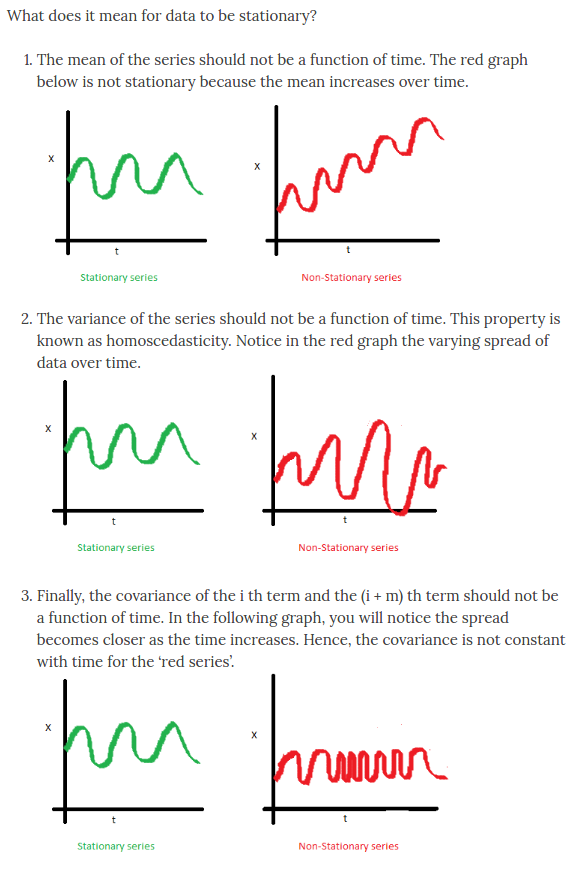

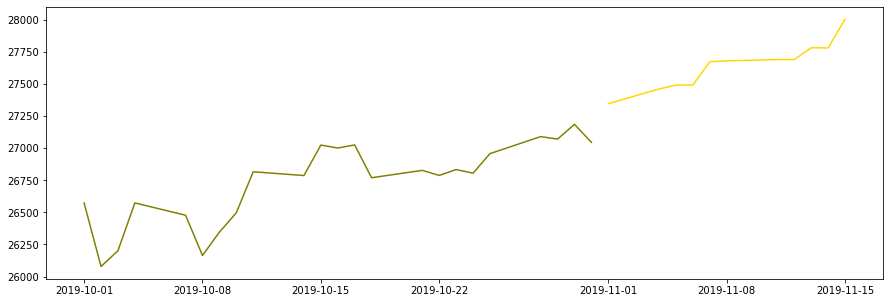

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,5))
ts=df['Close']
train=ts['2019-10-1':'2019-10-31']
test=ts['2019-11-1':'2019-11-15']
plt.plot(train, color='olive')  # in matplotlib.pyplot: plot --> line graph,scatter-->scatter plot, hist-->histogram, bar-->bar chart
plt.plot(test,color='gold')
plt.show()

### 5.Check Stationary of a Time Series
* **Unit root stationary tests**: a vitual test for checking stationarity.
* **Dickey-Fuller Test**: a statistical test for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a **Test Statistic** and some **Critical Values** for difference confidence levels. **If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary**.

Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

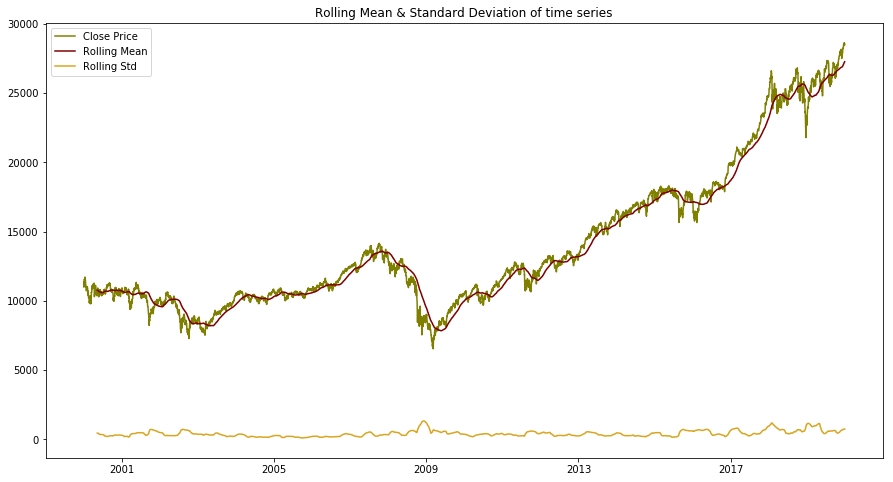

In [5]:
#Unit root stationary tests
#get rolling statistics
rollingmean = ts.rolling(window=66).mean()  #calculate moving average
rollingstd =  ts.rolling(window=66).std()   #calculate moving standard deviation

#Plot rolling statistics:
fig=plt.figure(figsize=(15,8))
plt.plot(ts, color='olive',label='Close Price')
plt.plot(rollingmean, color='maroon', label='Rolling Mean')
plt.plot(rollingstd, color='goldenrod', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of time series')
plt.show()

In [11]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts)
print(dftest)


(1.4979229159288623, 0.9975165942518865, 19, 5011, {'1%': -3.4316556581508197, '5%': -2.862116959995152, '10%': -2.567077116457145}, 63673.517757244816)


In [16]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
    return print(dfoutput)

adf_test(ts)


Results of Dickey-Fuller Test:
Test Statistic                    1.497923
p-value                           0.997517
#Lags Used                       19.000000
Number of Observations Used    5011.000000
Critical Value (1%)              -3.431656
Critical Value (5%)              -2.862117
Critical Value (10%)             -2.567077
dtype: float64


### 6.How to make a Time Series Stationary
* **Differencing**
* Differencing can help stabilize the mean of a time series by removing changes in the level of a time series, and so eliminating trend and seasonality
* Difference is performed by substracting the previous observation from the current observation
* difference(t)= observation(t)-observation(t-1)

* **Decomposition**
* Split out trend and seasonality and removing them from the model.

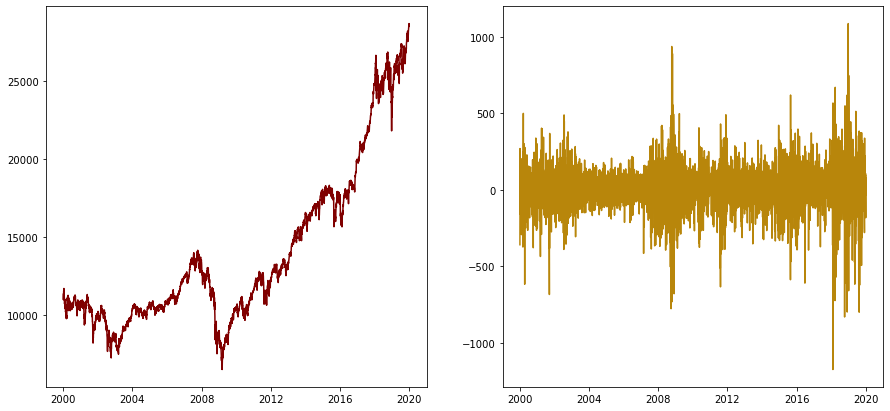

In [14]:
# 方法1: ts.diff()  方法2: ts-ts.shift()
ts_diff=ts.diff() 
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(121)
ax1.plot(ts,color='maroon')
ax2=fig.add_subplot(122)
ax2.plot(ts_diff,color='darkgoldenrod')
plt.show()

In [17]:
#apply adf test on the series
ts_diff.dropna(inplace=True)
adf_test(ts_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.729720e+01
p-value                        5.657469e-30
#Lags Used                     1.800000e+01
Number of Observations Used    5.011000e+03
Critical Value (1%)           -3.431656e+00
Critical Value (5%)           -2.862117e+00
Critical Value (10%)          -2.567077e+00
dtype: float64


In [20]:
#apply adf test on 2nd order differencing
ts_diff2=ts.diff().diff().dropna()
adf_test(ts_diff2)

Results of Dickey-Fuller Test:
Test Statistic                  -21.674686
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    4997.000000
Critical Value (1%)              -3.431659
Critical Value (5%)              -2.862119
Critical Value (10%)             -2.567078
dtype: float64


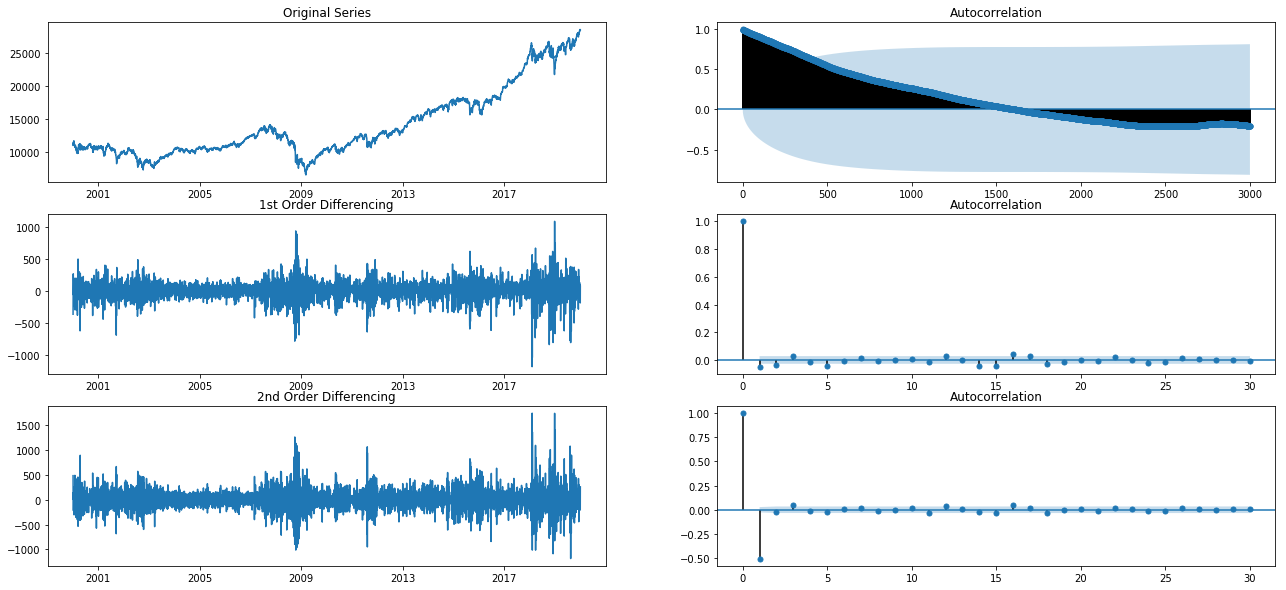

In [81]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# Original Series
fig=plt.figure(figsize=(22,10))
ax1=fig.add_subplot(321)
ax1.plot(ts);
ax1.set_title('Original Series')
ax2=fig.add_subplot(322)
plot_acf(ts,ax=ax2,lags=3000);

# 1st Differencing
ax3=fig.add_subplot(323)
ax3.plot(ts.diff());
ax3.set_title('1st Order Differencing')
ax4=fig.add_subplot(324)
plot_acf(ts.diff().dropna(), ax=ax4,lags=30)

# 2nd Differencing
ax5=fig.add_subplot(325)
ax5.plot(ts.diff().diff());
ax5.set_title('2nd Order Differencing')
ax6=fig.add_subplot(326)
plot_acf(ts.diff().diff().dropna(), ax=ax6,lags=30)
plt.show()

d=1

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

### Improvement
* **log transform**
*  we take a **weighted moving average** where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. 

Results of Dickey-Fuller Test:
Test Statistic                    0.533045
p-value                           0.985844
#Lags Used                       19.000000
Number of Observations Used    5011.000000
Critical Value (1%)              -3.431656
Critical Value (5%)              -2.862117
Critical Value (10%)             -2.567077
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -9.425831e+00
p-value                        5.350079e-16
#Lags Used                     1.800000e+01
Number of Observations Used    5.012000e+03
Critical Value (1%)           -3.431655e+00
Critical Value (5%)           -2.862117e+00
Critical Value (10%)          -2.567077e+00
dtype: float64
None


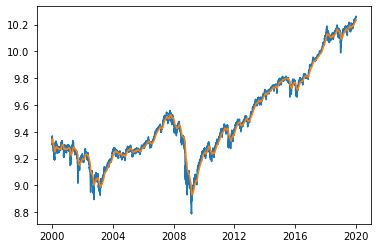

In [21]:
import numpy as np
ts_log = np.log(ts)
ts_log_ewma=ts_log.ewm(alpha=0.04).mean()  #ts_log.rolling(windows=92).mean()
plt.plot(ts_log)
plt.plot(ts_log_ewma)
ts_log_ewm_diff=ts_log-ts_log_ewma
ts_log_ewm_diff.dropna(inplace=True)
print(adf_test(ts_log_ewma))
print(adf_test(ts_log_ewm_diff))

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

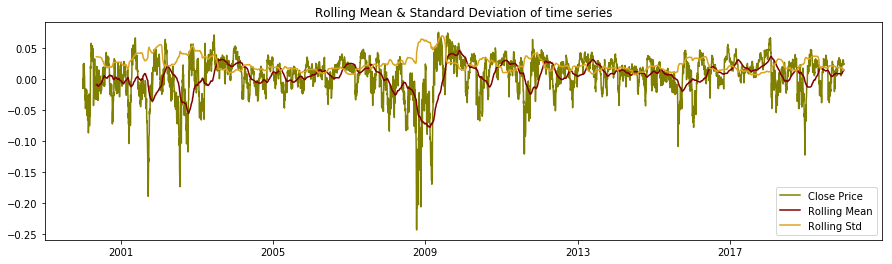

In [83]:
#Unit root stationary tests
#get rolling statistics
rollingmean = ts_log_ewm_diff.rolling(window=92).mean()
rollingstd =  ts_log_ewm_diff.rolling(window=92).std()

#Plot rolling statistics:
fig=plt.figure(figsize=(15,4))
orig = plt.plot(ts_log_ewm_diff, color='olive',label='Close Price')
mean = plt.plot(rollingmean, color='maroon', label='Rolling Mean')
std = plt.plot(rollingstd, color='goldenrod', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of time series')
plt.show()

### Decomposition
Split out trend and seasonality and removing them from the model.

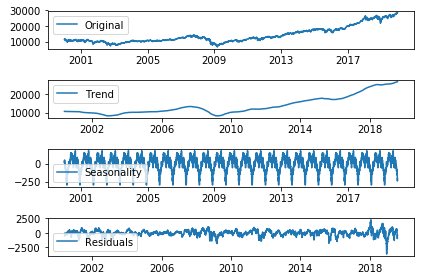

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=200)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [13]:
ts_residual=residual.dropna()
adf_test(ts_residual) 

Results of Dickey-Fuller Test:
Test Statistic                -1.004990e+01
p-value                        1.421668e-17
#Lags Used                     2.700000e+01
Number of Observations Used    4.803000e+03
Critical Value (1%)           -3.431712e+00
Critical Value (5%)           -2.862142e+00
Critical Value (10%)          -2.567090e+00
dtype: float64


### 7.Forecasting-ARIMA Model

#### ARIMA= Autoregressive(AR)+Integrated+Moving Average(MA)

**1. Auto-regression(AR)**

1.1 Autocorrelation function (ACF) describes the correlation of items at each teimepoint xt with x(t-1),x(t-2) ... and so on

1.2 Parameter: p(lag order): number of lag observations included in the model

1.3 Codition/Assumption:Stationary dataset

**2. Integration (I)**

2.1 the reverse of differencing

2.2 Parameter: d: how many times to perform differencing

**3. Moving Average (MA)**

3.1 Moving average(MA) removes random movements from a time series

3.2 It helps smooth out value movement by filtering out the 'noise' from random short-term value fluctuations

3.2 Parameter: q(order of moving average): size of the moving average window




### 8.Choosing ARIMA Parameters

**1. Partial Autocorrelation Chart (PACF)--control p**

1.1 Partial autocorrelation function (PACF) describes the correlation of items at each timepoint xt with x(t-1),x(t-2)...but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4

**2. Autocorrelation chart (ACF) --- control d,q**

2.1 Autocorrelation function (ACF) describes the correlation of items at each timepoint xt with x(t-1),x(t-2)...so on


**In most cases weather p=0 or q=0, and p+q <=3**


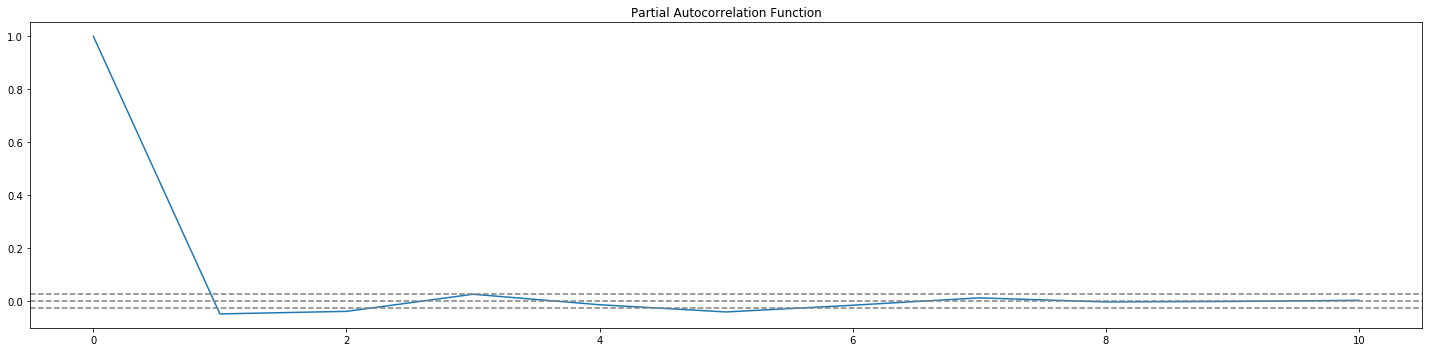

In [37]:
#PACF plots:
from statsmodels.tsa.stattools import pacf
lag_pacf = pacf(ts.diff().dropna(), nlags=10, method='ols')
#Plot PACF:
plt.figure(figsize=(20,5))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### p – The lag value where the PACF chart crosses 0 interval for the first time. If you notice closely, in this case p=1.

Text(0.5,1,'Autocorrelation Function')

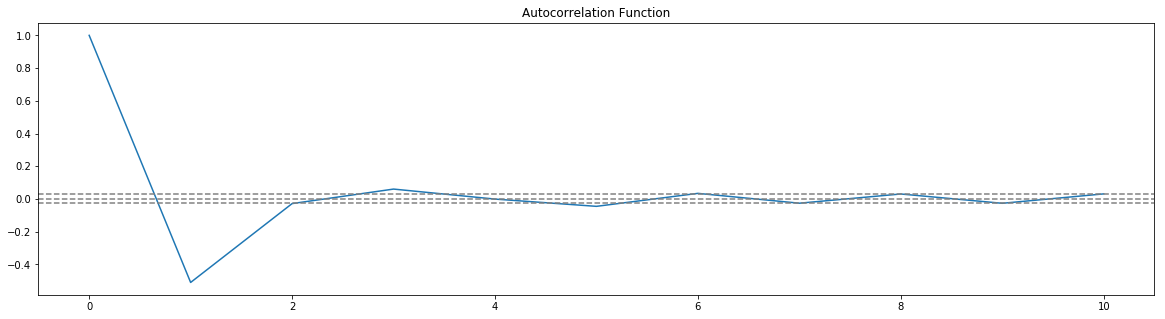

In [105]:
#ACF plots:
#方法2:from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import acf
lag_acf = acf(ts.diff().dropna(), nlags=10)
#Plot ACF: 
plt.figure(figsize=(20,5))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#### q – The lag value where the ACF chart crosses 0  for the first time. If you notice closely, in this case q=1.

### 9. Build ARIMA Model
use the parameters selected priviousely to build ARIMA model using statsmodels.tsa.arima_model
similar to Sklearn

/Users/wangke/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/wangke/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

[[26689.99517617 27383.33152239]
 [26532.05176893 27593.91160733]
 [26422.8970902  27745.42030207]
 [26335.65292119 27876.4916901 ]
 [26262.03038557 27993.73037808]
 [26197.93423998 28101.47291567]
 [26140.97578155 28202.07343364]
 [26089.62620415 28297.06569131]
 [26042.83469349 28387.4997933 ]
 [25999.84265649 28474.13443438]
 [25960.08112493 28557.53856819]]


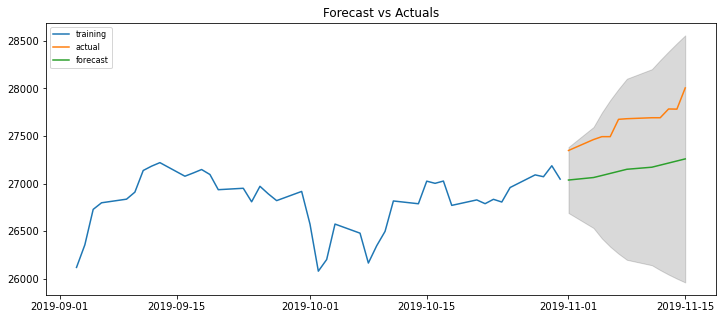

In [3]:
from statsmodels.tsa.arima_model import ARIMA
# Build Model
#model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf
print(conf)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [26]:
conf

array([[26802.4490976 , 27463.79033215],
       [26828.67056023, 27555.16000664],
       [26868.31642851, 27607.56408614],
       [26907.22912485, 27649.09103209],
       [26944.53935615, 27686.94272513],
       [26980.86429912, 27723.38060451],
       [27016.68850887, 27759.22865291],
       [27052.27418862, 27794.81949153],
       [27087.74918519, 27830.29566398],
       [27123.17340255, 27865.72017818],
       [27158.57444087, 27901.12130623]])

In [28]:
print(fc_series )

Date
2019-11-01    27133.119715
2019-11-04    27191.915283
2019-11-05    27237.940257
2019-11-06    27278.160078
2019-11-07    27315.741041
2019-11-08    27352.122452
2019-11-11    27387.958581
2019-11-12    27423.546840
2019-11-13    27459.022425
2019-11-14    27494.446790
2019-11-15    27529.847874
dtype: float64


In [41]:
(test-fc_series).abs().mean()

460.58660346862433

In [40]:
for i in range(5):
    print (i)

0
1
2
3
4


In [11]:
#Ignore wornings
import warnings
warnings.filterwarnings('ignore')

#define a function to do hyperparameter tuning for ARIMA model
def ARIMA_Tuning(p,d,q):
    error_min=1000
    for i in range(p):
        for j in range(d):
            for k in range(q):
                # Build Model
                model = ARIMA(train, order=(i, j, k))  
                fitted = model.fit(disp=0)  

                # Forecast
                fc, se, conf = fitted.forecast(11, alpha=0.05)  # 95% conf
                fc_series = pd.Series(fc, index=test.index)
                
                #find the mean absolute error
                error=(test-fc_series).abs().mean()
                if error<error_min:
                    error_min=error
                    best_p=i
                    best_d=j
                    best_q=k
                print(error)
                print(i,j,k)
    print(("the minimum absolute mean error is: %d" %error_min))
    print(("the best parameter are: %d%d%d "%(best_p,best_d,best_q)))             
        
ARIMA_Tuning(3,2,2)

909.0316435138352
0 0 0
898.0446752376047
0 0 1
470.5466971818218
0 1 0
342.66032002916603
0 1 1
799.5414788517013
1 0 0
829.6943598748895
1 0 1
428.01432426432274
1 1 0
300.02742817977395
1 1 1
827.8653002001338
2 0 0
827.2641160184044
2 0 1
379.5225865359862
2 1 0
302.1298459439475
2 1 1
the minimum absolute mean error is: 300
the best parameter are: 111 


### Homework: Use differentiated data to do forecasting 

### 9.How To Measure Model Performance
**1. Mean Forecast Error (MFE)**
* -Measure of the average deviation of forecasted values from actual ones
* -Shows the direction of error as Forecast Bias
* -Desirable that the MFE is as close to 0 as possible

**2. Mean Absolute Error (MAE)**
* -Meaures the average absolute deviation of forecasted values from actual ones
* -MAEdose not provide any idea about the direction of errors
* -Fore a good forcast, the obtained MAE should be as close to 0 as possible

**3. Mean Squared Error(MSE)**
* -Measure of average squared deviation of forecasted values
* -MSE gives an overall idea of the error occurred during forcasting
* -MSE is sensitive to the change of scale and data transformations

### 10. Recap: Steps of Building an ARIMA Model
1. Extract/Load data
2. Dataset Pre-processing
    * Type conversion on Timestamp,Volume, Data time etc
3. Dataset Stationary
    * Exam the time series stationary and stationary the series
4. Determine number of differencing and d value
5. Plot ACF and PACF chart
    * To determine the ARIMA parameters (p,q)
6. Fit the model
7. Predict on the testing dataset 
8. Validate the model, Calculate Mean absolute error
   